In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
names1880=pd.read_csv("babynames/yob1880.txt", header=None, names=['name', 'sex', 'births'])
names1880
#퀴즈3
#names1880에서 성별에 따른 태어난 아이들 수 수의 합계 출력
names1880.groupby('sex').births.sum()

years=range(1880,2011)
pieces=[]

In [3]:
for year in years:
    path="babynames/yob%d.txt" % year
    frame=pd.read_csv(path, header=None, names=['name', 'sex', 'births'])
    frame['year']=year
    pieces.append(frame)
    #print(frame)
    #print(path)

In [4]:
len(pieces[0][pieces[0].sex=='F']) #942
len(pieces[130][pieces[130].sex=='F']) #19698
#1880년 여자 아이들의 이름의 종류:942,
#2010년 여자 아이들의 이름의 종류:19698
#이름이 매우 다양해졌다
#시각화()

19698

In [6]:
len(pieces)

131

### 시대별로 특정 이름이 차지하는 비율->이름이 흔한지 여부 확인 
### 이름의 상대 순위
### 각 연도별로 가장 인기있는 이름?
### 가장 많이 증가하거나 감소한 이름
### 모음, 자음, 길이, 철자 변화, 첫글자와 끝글자 등 이름 유행 분석
### 유명인의 이름, 인구 통계학적 변화

In [9]:
names=pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [15]:
total_births=names.pivot_table('births',index='year',columns='sex',aggfunc=sum)

<AxesSubplot:xlabel='year'>

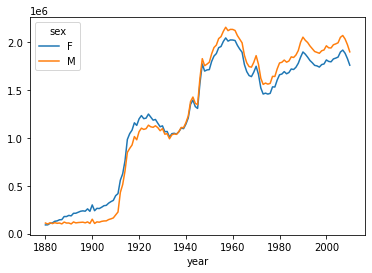

In [16]:
total_births.plot()

In [17]:
#prop컬럼(각 이름이 전체(해당연도) 출생수에서 차지하는 비율)추가

In [18]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [19]:
#names를 연도와 성별로 그룹화(그룹수=131*2=262개그룹)
#262개 각각의 그룹에 대해 모든 이름에 대한 출생수 비율

In [101]:
def add_prop(group):
    group['prop']=group.births/group.births.sum()
    return group


names=names.groupby(['year','sex']).apply(add_prop)


In [102]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [103]:
#names에서 연도와 성별을 기준으로 그룹화 한 다음 prop의 합계 출력
names.groupby(['year','sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

### 각 연도별/성별에 따른 선호하는 이름 1000개 추출

In [104]:
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]


top1000=names.groupby(['year','sex']).apply(get_top1000)

In [105]:
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [106]:
top1000.loc[1880]

name sex  births  year      prop
sex                                            
F   0          Mary   F    7065  1880  0.077643
    1          Anna   F    2604  1880  0.028618
    2          Emma   F    2003  1880  0.022013
    3     Elizabeth   F    1939  1880  0.021309
    4        Minnie   F    1746  1880  0.019188
...             ...  ..     ...   ...       ...
M   1880       Cleo   M       5  1880  0.000045
    1881   Crockett   M       5  1880  0.000045
    1882      Cyril   M       5  1880  0.000045
    1883      Daisy   M       5  1880  0.000045
    1884     Denver   M       5  1880  0.000045

[1942 rows x 5 columns]

In [107]:
top1000.loc[2010]

name sex  births  year      prop
sex                                              
F   1656946  Isabella   F   22731  2010  0.012923
    1656947    Sophia   F   20477  2010  0.011641
    1656948      Emma   F   17179  2010  0.009766
    1656949    Olivia   F   16860  2010  0.009585
    1656950       Ava   F   15300  2010  0.008698
...               ...  ..     ...   ...       ...
M   1677639    Camilo   M     194  2010  0.000102
    1677640    Destin   M     194  2010  0.000102
    1677641    Jaquan   M     194  2010  0.000102
    1677642    Jaydan   M     194  2010  0.000102
    1677645    Maxton   M     193  2010  0.000102

[2000 rows x 5 columns]

In [108]:
top1000.reset_index(inplace=True, drop=True)
#drop=True 옵션 기존 인덱스를 drop하고 새로운 인덱스를 부여(0~)
#Inplace=TRUE옵션은 reset 결과를 top1000에 반영

In [109]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [110]:
top1000.set_index(['births','sex'],drop=True)

name  year      prop
births sex                           
7065   F         Mary  1880  0.077643
2604   F         Anna  1880  0.028618
2003   F         Emma  1880  0.022013
1939   F    Elizabeth  1880  0.021309
1746   F       Minnie  1880  0.019188
...               ...   ...       ...
194    M       Camilo  2010  0.000102
       M       Destin  2010  0.000102
       M       Jaquan  2010  0.000102
       M       Jaydan  2010  0.000102
193    M       Maxton  2010  0.000102

[261877 rows x 3 columns]

In [111]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [112]:
boys=top1000[top1000.sex=='M']
girls=top1000[top1000.sex=='F']

In [113]:
boys

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [114]:
total_births=top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)

#연도와 이름에 대한 전체 출생수 피봇테이블

In [115]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [116]:
subset=total_births[['John','Harry','Marilyn','Sophia','Mary']]

<AxesSubplot:xlabel='year'>

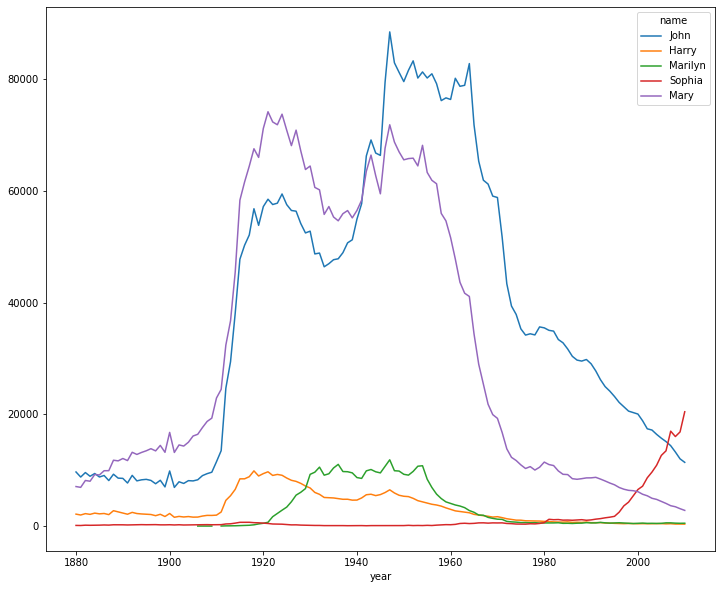

In [117]:
subset.plot(figsize=(12,10))

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

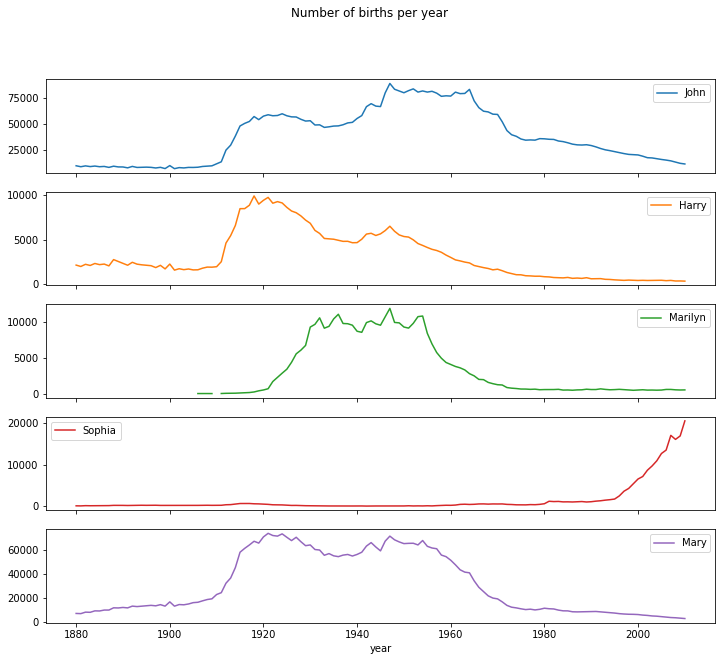

In [118]:
subset.plot(figsize=(12,10),subplots=True,title='Number of births per year')

### 이름의 다양성 측정

In [119]:
top1000
#연도별/성별 prop합계 -> 값이 1에 가까우면->이름이 다양하지 않다(흔하다)
#연도별/성별 prop합계 -> 값이 0에 가까우면->이름이 다양하다(흔하지않다)

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [120]:
top1000.pivot_table('prop',index='year',columns='sex')

sex,F,M
year,,
1880,0.001062,0.000997
1881,0.001066,0.001003
1882,0.000999,0.000996
1883,0.000998,0.000999
1884,0.000993,0.000995
...,...,...
2006,0.000753,0.000860
2007,0.000746,0.000855
2008,0.000741,0.000850


### 이름으로 정렬->전체 출생수의 50%를 차지하는 이름의 종류 개수를 출력

In [124]:
boys
#1000*131 = 131000개(실제 130997개)
df=boys[boys.year==2010]
#prop열의 누적합이 50%(0.5)가 되는 지점까지 이름의 종류 개수
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [136]:
prop_cumsum=df.sort_values(by='prop',ascending=False).prop.cumsum()  
#cumsum함수 : 누적합
prop_cumsum[:117]  #0~116번까지 
#116번 index에서 0.5가 넘어감
prop_cumsum.values.searchsorted(0.5)
#searchsorted하면 0.5가 넘어간 지점 바로 알 수 있음

116

In [138]:
df=boys[boys.year==1900]
df

,name,sex,births,year,prop
40877,John,M,9834,1900,0.065319
40878,William,M,8580,1900,0.056990
40879,James,M,7246,1900,0.048129
40880,George,M,5405,1900,0.035901
40881,Charles,M,4102,1900,0.027246
...,...,...,...,...,...
41872,Theron,M,8,1900,0.000053
41873,Terrell,M,8,1900,0.000053
41874,Solon,M,8,1900,0.000053
41875,Rayfield,M,8,1900,0.000053


In [141]:
in1900=df.sort_values(by='prop',ascending=False).prop.cumsum()  
in1900.values.searchsorted(0.5)

24

In [142]:
in1900.iloc[23]

0.49616748807736766

In [143]:
in1900.iloc[24]

0.5036332478711958

In [144]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [150]:
def get_quantile_count(group,q=0.5):
    temp=group.sort_values(by='prop',ascending=False).prop.cumsum()  
    return temp.values.searchsorted(q)+1
    

diversity=top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity=diversity.unstack('sex')
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


In [149]:
#1880  F       38: 1880년에 여자아이의 이름중에서 상위 50%에 해당하는 이름의 개수가 38개

<AxesSubplot:xlabel='year'>

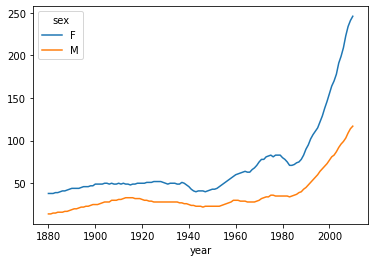

In [151]:
diversity.plot()

In [227]:
#시리즈에 저장된 문자열 각각에 대해 마지막 글자 추출
last_letters=names.name.map(lambda x: x[-1])
last_letters.name='last_letter'

In [228]:
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, Length: 1690784, dtype: object

In [229]:
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, Length: 1690784, dtype: object

In [230]:
table=names.pivot_table('births', index=last_letters,
                  columns=['sex','year'],aggfunc=sum)
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
f                NaN      NaN      NaN  ...    1758.0    1817.0    1819.0   
g               25.0     44.0     28.0  ...    2151.0    2084.0    2009.0   
h             7141.0   8630.0   8826.0  ...   85959.0   88085.0   88226.0   
i              105.0    141.0    134.0  ...   20980.0   23610.0   26011.0   
j                NaN      NaN      NaN  ...    1069.0    1088.0    1203.0   
k               19.0     21.0     22.0  ...   42477.0   42043.0   42296.0   
l             6175.0   7900.0   8395.0  ...  153648.0  153493.0  153862.0   
m               90.0    123.0    137.0  ...   41967.0   42663.0   42790.0   
n             5512.0   6833.0   7103.0  ...  616099.0  630322.0  663419.0   
o               97.0    134.0    142.0  ...   82146.0   83180.0   85423.0   
p                NaN      NaN      NaN  ...    3419.0    3157.0    2982.0   
q                NaN      NaN      NaN  ...     602.0     618.0     585.0   
r              910.0   1207.0   1214.0  ...  165377.0  164821.0  169878.0   
s             2803.0   3582.0   3569.0  ...  143791.0  139595.0  138632.0   
t             3140.0   3816.0   3784.0  ...

In [231]:
subtable=table.reindex(columns=[1910,1930,1960,2010],level='year')
subtable

sex                 F                                      M            \
year             1910      1930      1960      2010     1910      1930   
last_letter                                                              
a            108376.0  288291.0  691247.0  670605.0    977.0    3566.0   
b                 NaN      20.0     694.0     450.0    411.0    3019.0   
c                 5.0      14.0      49.0     946.0    482.0    1784.0   
d              6750.0   12124.0    3729.0    2607.0  22111.0  183033.0   
e            133569.0  305386.0  435013.0  313833.0  28655.0  131778.0   
f                 NaN       NaN      20.0      97.0    152.0     461.0   
g                57.0      89.0     318.0     657.0    437.0    1390.0   
h             20427.0   39447.0   73247.0  133424.0   8848.0   47202.0   
i               605.0    2209.0   80812.0   55820.0    164.0     694.0   
j                 NaN       NaN       NaN     159.0      NaN       NaN   
k                48.0     235.0     315.0     626.0   7104.0   33817.0   
l             17121.0   27898.0   68482.0   46360.0  12626.0   69544.0   
m               476.0    1552.0   17417.0    4552.0  11272.0   53911.0   
n             31412.0  120981.0  264258.0  246631.0  27851.0  152510.0   
o               658.0    4148.0    4932.0    2187.0   3314.0   20409.0   
p                 7.0      28.0      47.0      35.0    616.0    3905.0   
q                 NaN       NaN       NaN      53.0      NaN       NaN   
r              5308.0   11449.0   13677.0   31707.0  12522.0   51318.0   
s             15477.0   76178.0   25810.0   23451.0  25404.0  140540.0   
t             10877.0   29445.0   30738.0   13773.0  14153.0  100613.0   
u               271.0     893.0    1161.0     734.0     24.0     215.0   
v                 NaN       NaN     122.0     205.0     22.0      51.0   
w                 8.0      57.0      63.0    2080.0   1229.0    4264.0   
x                 6.0      33.0      74.0    1279.0    770.0    3090.0   
y             43991.0  203613.0  308504.0  205501.0  15021.0   89286.0   
z               967.0    1431.0    1333.0    1238.0     33.0     263.0   

sex                              
year             1960      2010  
last_letter                      
a              5204.0   28438.0  
b              3912.0   38859.0  
c             15476.0   23125.0  
d            262112.0   44398.0  
e            178823.0  129012.0  
f              9224.0    2255.0  
g             20235.0    2666.0  
h             80841.0   98090.0  
i              1286.0   42956.0  
j                 NaN    1459.0  
k            105315.0   35198.0  
l            223716.0  133583.0  
m             72139.0   46808.0  
n            325266.0  688677.0  
o             27358.0   81025.0  
p             12102.0    2409.0  
q                 NaN     342.0  
r             66183.0  166064.0  
s            219080.0  123670.0  
t            140015.0   43398.0  
u               122.0    2318.0  
v                78.0    2723.0  
w             16444.0   30656.0  
x              3947.0   16352.0  
y            343318.0  110425.0  
z               392.0    3476.0

### 전체 출생자수에서 성별로 나누어 마지막 글자가 차지하는 비율?

In [232]:
subtable.sum()

sex  year
F    1910     396416.0
     1930    1125521.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1930    1096663.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [233]:
letter_prop=subtable / subtable.sum()
letter_prop

sex                 F                                       M            \
year             1910      1930      1960      2010      1910      1930   
last_letter                                                               
a            0.273390  0.256140  0.341853  0.381240  0.005031  0.003252   
b                 NaN  0.000018  0.000343  0.000256  0.002116  0.002753   
c            0.000013  0.000012  0.000024  0.000538  0.002482  0.001627   
d            0.017028  0.010772  0.001844  0.001482  0.113858  0.166900   
e            0.336941  0.271329  0.215133  0.178415  0.147556  0.120163   
f                 NaN       NaN  0.000010  0.000055  0.000783  0.000420   
g            0.000144  0.000079  0.000157  0.000374  0.002250  0.001267   
h            0.051529  0.035048  0.036224  0.075852  0.045562  0.043041   
i            0.001526  0.001963  0.039965  0.031734  0.000844  0.000633   
j                 NaN       NaN       NaN  0.000090       NaN       NaN   
k            0.000121  0.000209  0.000156  0.000356  0.036581  0.030836   
l            0.043189  0.024787  0.033867  0.026356  0.065016  0.063414   
m            0.001201  0.001379  0.008613  0.002588  0.058044  0.049159   
n            0.079240  0.107489  0.130687  0.140210  0.143415  0.139067   
o            0.001660  0.003685  0.002439  0.001243  0.017065  0.018610   
p            0.000018  0.000025  0.000023  0.000020  0.003172  0.003561   
q                 NaN       NaN       NaN  0.000030       NaN       NaN   
r            0.013390  0.010172  0.006764  0.018025  0.064481  0.046795   
s            0.039042  0.067682  0.012764  0.013332  0.130815  0.128152   
t            0.027438  0.026161  0.015201  0.007830  0.072879  0.091745   
u            0.000684  0.000793  0.000574  0.000417  0.000124  0.000196   
v                 NaN       NaN  0.000060  0.000117  0.000113  0.000047   
w            0.000020  0.000051  0.000031  0.001182  0.006329  0.003888   
x            0.000015  0.000029  0.000037  0.000727  0.003965  0.002818   
y            0.110972  0.180906  0.152569  0.116828  0.077349  0.081416   
z            0.002439  0.001271  0.000659  0.000704  0.000170  0.000240   

sex                              
year             1960      2010  
last_letter                      
a            0.002440  0.014980  
b            0.001834  0.020470  
c            0.007257  0.012181  
d            0.122908  0.023387  
e            0.083853  0.067959  
f            0.004325  0.001188  
g            0.009488  0.001404  
h            0.037907  0.051670  
i            0.000603  0.022628  
j                 NaN  0.000769  
k            0.049384  0.018541  
l            0.104904  0.070367  
m            0.033827  0.024657  
n            0.152522  0.362771  
o            0.012829  0.042681  
p            0.005675  0.001269  
q                 NaN  0.000180  
r            0.031034  0.087477  
s            0.102730  0.065145  
t            0.065655  0.022861  
u            0.000057  0.001221  
v            0.000037  0.001434  
w            0.007711  0.016148  
x            0.001851  0.008614  
y            0.160987  0.058168  
z            0.000184  0.001831

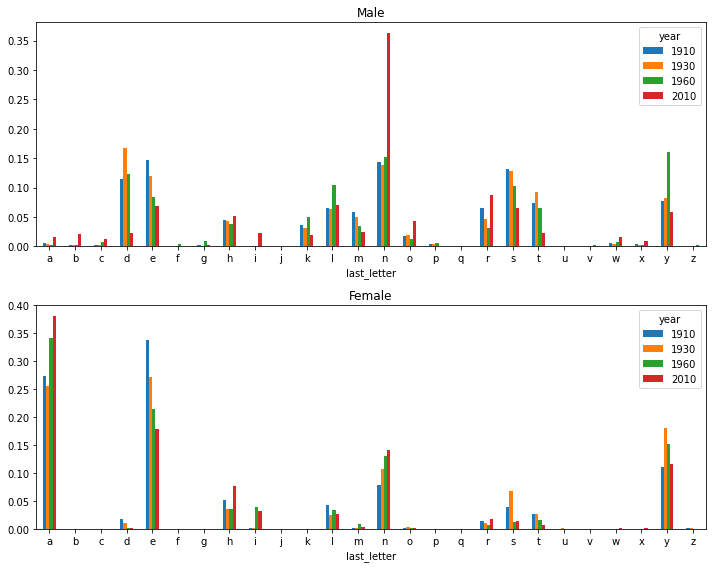

In [234]:
fig,axes=plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',ax=axes[0],rot=0,title='Male')
letter_prop['F'].plot(kind='bar',ax=axes[1],rot=0,title='Female')
plt.tight_layout()

In [221]:
#letter_prop['F']

In [222]:
#시리즈에 저장된 문자열 각각에 대해 첫번째 글자 추출
last_letters=names.name.map(lambda x: x[0])
last_letters.name='last_letter'

In [223]:
table=names.pivot_table('births', index=last_letters,
                  columns=['sex','year'],aggfunc=sum)
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
A             9334.0   9405.0  11001.0  11632.0  13324.0  13437.0  14416.0   
B             3874.0   4013.0   4824.0   5194.0   6005.0   6340.0   6990.0   
C             5868.0   5661.0   6454.0   6857.0   7919.0   8164.0   8412.0   
D             2218.0   2299.0   2557.0   2709.0   3060.0   3031.0   3231.0   
E            11444.0  11742.0  13771.0  14449.0  16465.0  17379.0  18825.0   
F             2957.0   2875.0   3512.0   3614.0   4196.0   4499.0   5065.0   
G             2463.0   2621.0   3054.0   3210.0   3790.0   4007.0   4533.0   
H             2743.0   2630.0   3192.0   3373.0   3973.0   4174.0   4648.0   
I             2480.0   2456.0   2788.0   2890.0   3389.0   3450.0   3870.0   
J             3801.0   3813.0   4491.0   4612.0   5239.0   5528.0   5828.0   
K             1514.0   1473.0   1729.0   1752.0   1971.0   2064.0   2212.0   
L             8714.0   8970.0  10417.0  11051.0  12248.0  12687.0  13663.0   
M            19779.0  19670.0  23213.0  23631.0  27079.0  27529.0  29540.0   
N             3026.0   3291.0   3536.0   3774.0   4231.0   4346.0   4653.0   
O              968.0    974.0   1244.0   1391.0   1624.0   1601.0   1939.0   
P             1064.0   1144.0   1442.0   1564.0   1889.0   1960.0   2136.0   
Q               28.0     22.0     22.0     17.0     32.0     28.0     50.0   
R             2647.0   2715.0   3198.0   3235.0   3943.0   4230.0   4559.0   
S             3958.0   3935.0   4587.0   4483.0   5084.0   5056.0   5682.0   
T              503.0    513.0    618.0    685.0    844.0    750.0    960.0   
U               15.0     20.0     34.0     26.0     37.0     57.0     50.0   
V              930.0    959.0   1281.0   1292.0   1563.0   1706.0   1970.0   
W              467.0    544.0    640.0    640.0    781.0    747.0    904.0   
X                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
Y                7.0      NaN      NaN      NaN      5.0      7.0     13.0   
Z              191.0    210.0    246.0    241.0    330.0    279.0    389.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
A            14836.0  17729.0  17689.0  ...  189874.0  195896.0  208421.0   
B             7110.0   8775.0   8744.0  ...  102260.0  102009.0  103251.0   
C             8605.0  10412.0  10257.0  ...  176796.0  171727.0  176042.0   
D             3144.0   3852.0   3732.0  ...  154619.0  151285.0  153742.0   
E            19140.0  23258.0  23244.0  ...   84224.0   90358.0   94306.0   
F             5253.0   6690.0   6607.0  ...   16445.0   15896.0   16565.0   
G             4558.0   5676.0   5908.0  ...   54536.0   56917.0   59826.0   
H             5002.0   6391.0   6629.0  ...   32295.0   33375.0   33648.0   
I             3862.0   4741.0   4782.0  ...   35630.0   36566.0   37990.0   
J             5629.0   7150.0   6893.0  ...  337470.0  337175.0  335152.0   
K             2310.0   2596.0   2592.0  ...   75640.0   76026.0   77075.0   
L            13611.0  16682.0  16427.0  ...   62313.0   65877.0   71223.0   
M            29632.0  35768.0  35784.0  ...  137238.0  133808.0  132089.0   
N             4695.0   5538.0   5439.0  ...   74284.0   72003.0   70740.0   
O             1960.0   2335.0   2438.0  ...   14709.0   16947.0   19314.0   
P             2286.0   2797.0   2770.0  ...   31945.0   30202.0   30151.0   
Q               33.0     38.0     46.0  ...    4794.0    4757.0    4907.0   
R             4612.0   5936.0   6135.0  ...   87789.0   85872.0   86587.0   
S             5395.0   6711.0   6549.0  ...   86209.0   84017.0   81629.0   
T              932.0   1126.0   1193.0  ...

In [224]:
subtable=table.reindex(columns=[1910,1930,1960,2010],level='year')
subtable

sex                F                                      M            \
year            1910      1930      1960      2010     1910      1930   
last_letter                                                             
A            34079.0   70518.0   88898.0  309608.0  12706.0   56263.0   
B            17117.0   96227.0  100925.0   64191.0   4325.0   41032.0   
C            18287.0   51557.0  191419.0   96780.0  15199.0   75259.0   
D            14529.0   86652.0  211674.0   47211.0   5251.0   73220.0   
E            45987.0   87919.0   58421.0  118824.0  13306.0   62902.0   
F            14626.0   27171.0   13475.0   13934.0   9070.0   37133.0   
G            16250.0   39597.0   40441.0   49385.0   8638.0   50539.0   
H            19385.0   32795.0   15197.0   46936.0  12811.0   56110.0   
I            10419.0   19236.0    8026.0   47144.0   1572.0    5262.0   
J            15950.0  103057.0  175223.0  118205.0  34856.0  180122.0   
K             5078.0   11300.0  149850.0  144023.0   1354.0   15809.0   
L            33585.0   72262.0  193460.0  115540.0  10976.0   53226.0   
M            72790.0  178739.0  172838.0  173879.0   7495.0   39694.0   
N             7775.0   30921.0   36930.0   54043.0   2251.0   13877.0   
O             5693.0    8017.0    2669.0   19629.0   2734.0    8736.0   
P             7012.0   43536.0   98427.0   32233.0   4703.0   26851.0   
Q              137.0     258.0     200.0    1917.0     43.0     259.0   
R            21721.0   59513.0   94663.0   56560.0  15765.0  152054.0   
S            11534.0   37944.0  186448.0  136880.0   5775.0   22975.0   
T             5587.0   15086.0  111748.0   40149.0   5503.0   30126.0   
U              159.0     376.0     333.0     590.0     85.0     420.0   
V            13144.0   33376.0   45277.0   29088.0   1801.0   11079.0   
W             4219.0   15811.0   16883.0    3826.0  17899.0   83241.0   
X                NaN      13.0      27.0    2411.0      NaN      17.0   
Y              295.0    1966.0    7588.0   11561.0     20.0     191.0   
Z             1058.0    1674.0    1022.0   24463.0     60.0     266.0   

sex                              
year             1960      2010  
last_letter                      
A             82001.0  198870.0  
B             95401.0  108460.0  
C            111173.0  168356.0  
D            240904.0  123298.0  
E             58281.0  102513.0  
F             31563.0   16191.0  
G             96514.0   61902.0  
H             27645.0   36378.0  
I              3918.0   37702.0  
J            318839.0  299282.0  
K             96895.0   83903.0  
L             64452.0  101327.0  
M            208289.0  123792.0  
N             15859.0   62540.0  
O              4733.0   23865.0  
P             66490.0   29735.0  
Q               583.0    4363.0  
R            263498.0   79825.0  
S            112986.0   70409.0  
T            135081.0   75030.0  
U               494.0    2946.0  
V             14382.0   11628.0  
W             81391.0   36196.0  
X               126.0    8774.0  
Y               342.0    7627.0  
Z               748.0   23470.0

In [225]:
letter_prop=subtable / subtable.sum()
letter_prop

sex                 F                                       M            \
year             1910      1930      1960      2010      1910      1930   
last_letter                                                               
A            0.085968  0.062654  0.043964  0.176013  0.065428  0.051304   
B            0.043179  0.085496  0.049912  0.036493  0.022271  0.037415   
C            0.046131  0.045807  0.094665  0.055020  0.078265  0.068625   
D            0.036651  0.076988  0.104682  0.026840  0.027039  0.066766   
E            0.116007  0.078114  0.028892  0.067552  0.068518  0.057358   
F            0.036896  0.024141  0.006664  0.007922  0.046705  0.033860   
G            0.040992  0.035181  0.020000  0.028075  0.044480  0.046084   
H            0.048901  0.029138  0.007516  0.026683  0.065969  0.051164   
I            0.026283  0.017091  0.003969  0.026801  0.008095  0.004798   
J            0.040236  0.091564  0.086656  0.067200  0.179487  0.164246   
K            0.012810  0.010040  0.074108  0.081877  0.006972  0.014416   
L            0.084722  0.064203  0.095675  0.065685  0.056520  0.048535   
M            0.183620  0.158806  0.085476  0.098850  0.038595  0.036195   
N            0.019613  0.027473  0.018264  0.030724  0.011591  0.012654   
O            0.014361  0.007123  0.001320  0.011159  0.014078  0.007966   
P            0.017688  0.038681  0.048677  0.018325  0.024218  0.024484   
Q            0.000346  0.000229  0.000099  0.001090  0.000221  0.000236   
R            0.054793  0.052876  0.046815  0.032154  0.081180  0.138652   
S            0.029096  0.033712  0.092207  0.077816  0.029738  0.020950   
T            0.014094  0.013404  0.055264  0.022825  0.028337  0.027471   
U            0.000401  0.000334  0.000165  0.000335  0.000438  0.000383   
V            0.033157  0.029654  0.022391  0.016537  0.009274  0.010102   
W            0.010643  0.014048  0.008349  0.002175  0.092169  0.075904   
X                 NaN  0.000012  0.000013  0.001371       NaN  0.000016   
Y            0.000744  0.001747  0.003753  0.006572  0.000103  0.000174   
Z            0.002669  0.001487  0.000505  0.013907  0.000309  0.000243   

sex                              
year             1960      2010  
last_letter                      
A            0.038451  0.104758  
B            0.044735  0.057133  
C            0.052131  0.088684  
D            0.112963  0.064949  
E            0.027329  0.054000  
F            0.014800  0.008529  
G            0.045257  0.032608  
H            0.012963  0.019163  
I            0.001837  0.019860  
J            0.149508  0.157651  
K            0.045435  0.044197  
L            0.030222  0.053375  
M            0.097670  0.065209  
N            0.007437  0.032944  
O            0.002219  0.012571  
P            0.031178  0.015663  
Q            0.000273  0.002298  
R            0.123558  0.042049  
S            0.052981  0.037089  
T            0.063341  0.039523  
U            0.000232  0.001552  
V            0.006744  0.006125  
W            0.038165  0.019067  
X            0.000059  0.004622  
Y            0.000160  0.004018  
Z            0.000351  0.012363

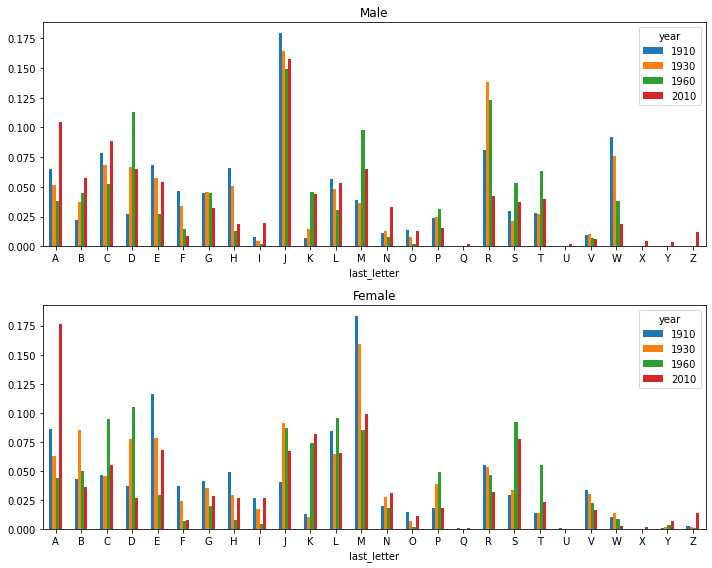

In [226]:
fig,axes=plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',ax=axes[0],rot=0,title='Male')
letter_prop['F'].plot(kind='bar',ax=axes[1],rot=0,title='Female')
plt.tight_layout()

In [201]:
letter_prop=table/table.sum()
letter_prop

sex                 F                                                    \
year             1880      1881      1882      1883      1884      1885   
last_letter                                                               
A            0.102579  0.102278  0.102002  0.103559  0.103270  0.100988   
B            0.042575  0.043641  0.044728  0.046242  0.046543  0.047649   
C            0.064488  0.061563  0.059842  0.061048  0.061378  0.061358   
D            0.024376  0.025001  0.023709  0.024118  0.023717  0.022780   
E            0.125768  0.127693  0.127685  0.128639  0.127615  0.130614   
F            0.032497  0.031265  0.032563  0.032175  0.032522  0.033813   
G            0.027068  0.028503  0.028317  0.028579  0.029375  0.030115   
H            0.030145  0.028601  0.029596  0.030030  0.030793  0.031370   
I            0.027255  0.026709  0.025850  0.025730  0.026267  0.025929   
J            0.041772  0.041466  0.041641  0.041061  0.040606  0.041546   
K            0.016639  0.016019  0.016031  0.015598  0.015277  0.015512   
L            0.095766  0.097548  0.096587  0.098387  0.094930  0.095351   
M            0.217368  0.213909  0.215232  0.210386  0.209881  0.206898   
N            0.033255  0.035789  0.032786  0.033600  0.032793  0.032663   
O            0.010638  0.010592  0.011534  0.012384  0.012587  0.012033   
P            0.011693  0.012441  0.013370  0.013924  0.014641  0.014731   
Q            0.000308  0.000239  0.000204  0.000151  0.000248  0.000210   
R            0.029090  0.029525  0.029652  0.028801  0.030561  0.031791   
S            0.043498  0.042793  0.042531  0.039912  0.039404  0.037999   
T            0.005528  0.005579  0.005730  0.006099  0.006542  0.005637   
U            0.000165  0.000217  0.000315  0.000231  0.000287  0.000428   
V            0.010221  0.010429  0.011877  0.011503  0.012114  0.012822   
W            0.005132  0.005916  0.005934  0.005698  0.006053  0.005614   
X                 NaN       NaN       NaN       NaN       NaN       NaN   
Y            0.000077       NaN       NaN       NaN  0.000039  0.000053   
Z            0.002099  0.002284  0.002281  0.002146  0.002558  0.002097   

sex                                                  ...         M            \
year             1886      1887      1888      1889  ...      2001      2002   
last_letter                                          ...                       
A            0.099738  0.101628  0.099249  0.099171  ...  0.097848  0.101032   
B            0.048361  0.048704  0.049124  0.049022  ...  0.052698  0.052611   
C            0.058199  0.058945  0.058288  0.057504  ...  0.091109  0.088567   
D            0.022354  0.021537  0.021564  0.020923  ...  0.079680  0.078025   
E            0.130243  0.131111  0.130201  0.130314  ...  0.043403  0.046602   
F            0.035043  0.035984  0.037452  0.037041  ...  0.008475  0.008198   
G            0.031362  0.031223  0.031775  0.033122  ...  0.028104  0.029355   
H            0.032158  0.034264  0.035778  0.037165  ...  0.016643  0.017213   
I            0.026775  0.026455  0.026541  0.026810  ...  0.018361  0.018859   
J            0.040322  0.038559  0.040027  0.038645  ...  0.173909  0.173896   
K            0.015304  0.015824  0.014533  0.014532  ...  0.038980  0.039210   
L            0.094529  0.093237  0.093388  0.092096  ...  0.032112  0.033976   
M            0.204375  0.202983  0.200234  0.200618  ...  0.070723  0.069011   
N            0.032192  0.032161  0.031002  0.030493  ...  0.038281  0.037135   
O            0.013415  0.013426  0.013072  0.013668  ...  0.007580  0.008740   
P            0.014778  0.015659  0.015658  0.015530  ...  0.016462  0.015577   
Q            0.000346  0.000226  0.000213  0.000258  ...  0.002470  0.002453   
R            0.031542  0.031593  0.033231  0.034395  ...  0.045240  0.044288   
S            0.039311  0.036956  0.037569  0.036716  ...  0.044426  0.043331   
T            0.006642  0.006384  0.006303  0.006688  ...  0.0508

<AxesSubplot:xlabel='year'>

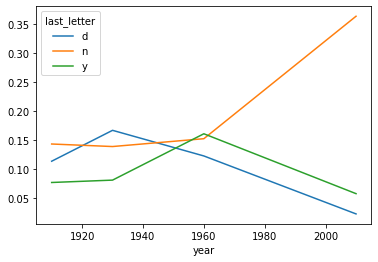

In [236]:
dny_ts=letter_prop.loc[['d','n','y'],'M'].T
dny_ts.plot()